In [1]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Add,Dense, Activation, Flatten
from tensorflow.keras.models import Model
from resnets_utils import *
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# with the per-pixel mean substracted
X_train_mean = np.mean(X_train, axis=0)
X_train -= X_train_mean
X_test -= X_train_mean

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [3]:
# a learning rate scheduler to change the learning rate
def my_schedule(epoch):
    if epoch > 180:
        learning_rate = 5e-7
    elif epoch > 160:
        learning_rate = 1e-6
    elif epoch > 120:
        learning_rate = 1e-5
    elif epoch > 80:
        learning_rate = 1e-4
    else:
        learning_rate = 1e-3
    print('Learning rate: ', learning_rate)
    return learning_rate

scheduler = LearningRateScheduler(my_schedule)

In [4]:
inp = Input(shape = (64,64,3))
x = Flatten()(inp) 

x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

x = Dense(6, activation='softmax')(x)

model = Model(inputs=inp, outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6291968   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              104960

In [5]:
model.compile(optimizer=optimizers.Adam(learning_rate=my_schedule(0)), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs = 300, batch_size = 32, callbacks=[scheduler])

Learning rate:  0.001
Train on 1080 samples, validate on 120 samples
Learning rate:  0.001
Epoch 1/300
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.7149 - accuracy: 0.2120 - val_loss: 1.6391 - val_accuracy: 0.2500
Learning rate:  0.001
Epoch 2/300
1080/1080 [==============================] - 0s 235us/sample - loss: 1.4572 - accuracy: 0.3157 - val_loss: 1.3960 - val_accuracy: 0.3333
Learning rate:  0.001
Epoch 3/300
1080/1080 [==============================] - 0s 236us/sample - loss: 1.3534 - accuracy: 0.3343 - val_loss: 1.3583 - val_accuracy: 0.4000
Learning rate:  0.001
Epoch 4/300
1080/1080 [==============================] - 0s 234us/sample - loss: 1.3591 - accuracy: 0.3065 - val_loss: 1.2967 - val_accuracy: 0.3583
Learning rate:  0.001
Epoch 5/300
1080/1080 [==============================] - 0s 235us/sample - loss: 1.2775 - accuracy: 0.3537 - val_loss: 1.2620 - val_accuracy: 0.3833
Learning rate:  0.001
Epoch 6/300
1080/1080 [==============================] -

1080/1080 [==============================] - 0s 254us/sample - loss: 3.1187 - accuracy: 0.3556 - val_loss: 1.8822 - val_accuracy: 0.1750
Learning rate:  0.001
Epoch 49/300
1080/1080 [==============================] - 0s 262us/sample - loss: 1.6683 - accuracy: 0.3009 - val_loss: 1.4452 - val_accuracy: 0.3583
Learning rate:  0.001
Epoch 50/300
1080/1080 [==============================] - 0s 246us/sample - loss: 1.3980 - accuracy: 0.3676 - val_loss: 1.3450 - val_accuracy: 0.3917
Learning rate:  0.001
Epoch 51/300
1080/1080 [==============================] - 0s 234us/sample - loss: 1.3237 - accuracy: 0.3519 - val_loss: 1.2444 - val_accuracy: 0.4333
Learning rate:  0.001
Epoch 52/300
1080/1080 [==============================] - 0s 237us/sample - loss: 1.1996 - accuracy: 0.4324 - val_loss: 1.1478 - val_accuracy: 0.4667
Learning rate:  0.001
Epoch 53/300
1080/1080 [==============================] - 0s 237us/sample - loss: 1.1635 - accuracy: 0.4278 - val_loss: 1.1795 - val_accuracy: 0.4333
Lea

Learning rate:  0.0001
Epoch 96/300
1080/1080 [==============================] - 0s 229us/sample - loss: 0.2153 - accuracy: 0.9315 - val_loss: 0.9359 - val_accuracy: 0.7833
Learning rate:  0.0001
Epoch 97/300
1080/1080 [==============================] - 0s 234us/sample - loss: 0.1953 - accuracy: 0.9426 - val_loss: 0.9078 - val_accuracy: 0.7917
Learning rate:  0.0001
Epoch 98/300
1080/1080 [==============================] - 0s 231us/sample - loss: 0.1769 - accuracy: 0.9454 - val_loss: 0.9452 - val_accuracy: 0.7833
Learning rate:  0.0001
Epoch 99/300
1080/1080 [==============================] - 0s 228us/sample - loss: 0.1856 - accuracy: 0.9370 - val_loss: 0.9479 - val_accuracy: 0.7917
Learning rate:  0.0001
Epoch 100/300
1080/1080 [==============================] - 0s 228us/sample - loss: 0.1492 - accuracy: 0.9593 - val_loss: 0.9871 - val_accuracy: 0.7917
Learning rate:  0.0001
Epoch 101/300
1080/1080 [==============================] - 0s 230us/sample - loss: 0.1574 - accuracy: 0.9528 - 

1080/1080 [==============================] - 0s 230us/sample - loss: 0.0452 - accuracy: 0.9917 - val_loss: 1.4888 - val_accuracy: 0.7917
Learning rate:  1e-05
Epoch 144/300
1080/1080 [==============================] - 0s 230us/sample - loss: 0.0449 - accuracy: 0.9917 - val_loss: 1.4949 - val_accuracy: 0.7917
Learning rate:  1e-05
Epoch 145/300
1080/1080 [==============================] - 0s 231us/sample - loss: 0.0447 - accuracy: 0.9917 - val_loss: 1.5017 - val_accuracy: 0.7917
Learning rate:  1e-05
Epoch 146/300
1080/1080 [==============================] - 0s 229us/sample - loss: 0.0444 - accuracy: 0.9917 - val_loss: 1.5079 - val_accuracy: 0.7917
Learning rate:  1e-05
Epoch 147/300
1080/1080 [==============================] - 0s 236us/sample - loss: 0.0442 - accuracy: 0.9917 - val_loss: 1.5134 - val_accuracy: 0.7917
Learning rate:  1e-05
Epoch 148/300
1080/1080 [==============================] - 0s 243us/sample - loss: 0.0439 - accuracy: 0.9917 - val_loss: 1.5177 - val_accuracy: 0.791

1080/1080 [==============================] - 0s 230us/sample - loss: 0.0401 - accuracy: 0.9926 - val_loss: 1.6125 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 191/300
1080/1080 [==============================] - 0s 230us/sample - loss: 0.0401 - accuracy: 0.9926 - val_loss: 1.6128 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 192/300
1080/1080 [==============================] - 0s 229us/sample - loss: 0.0401 - accuracy: 0.9926 - val_loss: 1.6135 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 193/300
1080/1080 [==============================] - 0s 231us/sample - loss: 0.0401 - accuracy: 0.9926 - val_loss: 1.6138 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 194/300
1080/1080 [==============================] - 0s 231us/sample - loss: 0.0401 - accuracy: 0.9926 - val_loss: 1.6142 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 195/300
1080/1080 [==============================] - 0s 228us/sample - loss: 0.0400 - accuracy: 0.9926 - val_loss: 1.6147 - val_accuracy: 0.791

1080/1080 [==============================] - 0s 234us/sample - loss: 0.0394 - accuracy: 0.9926 - val_loss: 1.6338 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 238/300
1080/1080 [==============================] - 0s 232us/sample - loss: 0.0394 - accuracy: 0.9926 - val_loss: 1.6342 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 239/300
1080/1080 [==============================] - 0s 232us/sample - loss: 0.0394 - accuracy: 0.9926 - val_loss: 1.6346 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 240/300
1080/1080 [==============================] - 0s 232us/sample - loss: 0.0394 - accuracy: 0.9926 - val_loss: 1.6354 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 241/300
1080/1080 [==============================] - 0s 232us/sample - loss: 0.0394 - accuracy: 0.9926 - val_loss: 1.6356 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 242/300
1080/1080 [==============================] - 0s 232us/sample - loss: 0.0393 - accuracy: 0.9926 - val_loss: 1.6364 - val_accuracy: 0.791

1080/1080 [==============================] - 0s 238us/sample - loss: 0.0387 - accuracy: 0.9926 - val_loss: 1.6599 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 285/300
1080/1080 [==============================] - 0s 245us/sample - loss: 0.0387 - accuracy: 0.9926 - val_loss: 1.6605 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 286/300
1080/1080 [==============================] - 0s 230us/sample - loss: 0.0386 - accuracy: 0.9926 - val_loss: 1.6610 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 287/300
1080/1080 [==============================] - 0s 234us/sample - loss: 0.0386 - accuracy: 0.9926 - val_loss: 1.6620 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 288/300
1080/1080 [==============================] - 0s 239us/sample - loss: 0.0386 - accuracy: 0.9926 - val_loss: 1.6624 - val_accuracy: 0.7917
Learning rate:  5e-07
Epoch 289/300
1080/1080 [==============================] - 0s 240us/sample - loss: 0.0386 - accuracy: 0.9926 - val_loss: 1.6632 - val_accuracy: 0.791

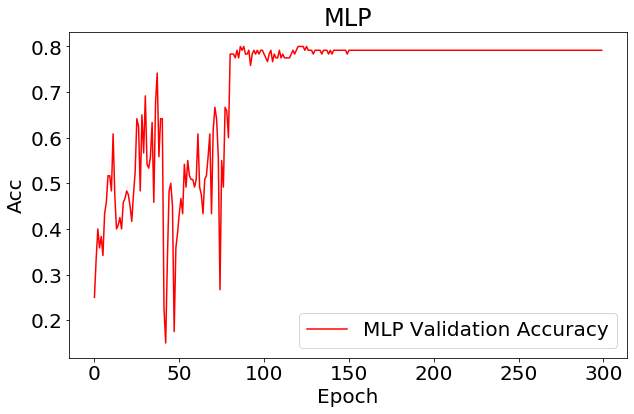

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig1,ax = plt.subplots(1,1,figsize=(10,6))

#ax.plot(acc, label='Training Accuracy')
ax.plot(val_acc,"r", label='MLP Validation Accuracy')

ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Acc', fontsize=20)
ax.set_title('MLP', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=4, fontsize=20)

plt.show()